In [1]:
%pip install opencv-python numpy pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install scikit-image scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import subprocess
import sys
# Ensuring required libraries are installed
def install_required_libraries():
    required_libraries = ["opencv-python", "numpy", "pandas","matplotlib","scikit-learn","scikit-image"]
    for lib in required_libraries:
        subprocess.check_call([sys.executable, "-m", "pip", "install", lib])
install_required_libraries()

#importing libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [4]:
# Feature Extraction Function
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None

    image = cv2.resize(image, (100, 100))

    # Brightness and contrast normalization
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    l = cv2.equalizeHist(l)
    image_lab = cv2.merge([l, a, b])
    image = cv2.cvtColor(image_lab, cv2.COLOR_LAB2BGR)

    # Color Features (Average R, G, B values)
    avg_color = np.mean(image, axis=(0, 1))

    # Texture Features using Local Binary Pattern (LBP)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')
    lbp_hist = np.histogram(lbp.ravel(), bins=10, range=(0, 10))[0]
    lbp_hist = lbp_hist / np.sum(lbp_hist)
    
    return list(avg_color) + list(lbp_hist)

In [5]:
# Load data from flat structure (e.g., 'fresh apple', 'rotten banana')
def load_data_from_directory(base_path):
    features_list = []
    labels_list = []
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if not os.path.isdir(folder_path):
            continue

        # Label: extract 'fresh' or 'rotten' from folder name
        if 'fresh' in folder.lower():
            label = 'fresh'
        elif 'rotten' in folder.lower():
            label = 'rotten'
        else:
            continue

        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            features = extract_features(img_path)
            if features is not None:
                features_list.append(features)
                labels_list.append(label)
    return pd.DataFrame(features_list), np.array(labels_list)

# Set dataset path 
dataset_path = "C:/Users/DELL/OneDrive/Desktop/AI Project/archive (2)/dataset" 
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

# Load training and testing data
X_train, y_train = load_data_from_directory(train_path)
X_test, y_test = load_data_from_directory(test_path)

if len(X_train) == 0 or len(X_test) == 0:
    raise ValueError("Training or Testing data is empty. Check dataset structure.")

if __name__ == "__main__":
    print("Training Data Shape:", X_train.shape)
    print("Testing Data Shape:", X_test.shape)
    print("Sample Feature Vector:", X_train.iloc[0])



Training Data Shape: (10901, 13)
Testing Data Shape: (2698, 13)
Sample Feature Vector: 0     107.5876
1     111.0299
2     156.3292
3       0.0309
4       0.0388
5       0.0271
6       0.0777
7       0.1166
8       0.1270
9       0.0459
10      0.0611
11      0.4024
12      0.0725
Name: 0, dtype: float64


In [6]:
# Train Models
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Models
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


SVM Accuracy: 0.7683469236471461
Random Forest Accuracy: 0.9392142327650111
SVM Classification Report:
               precision    recall  f1-score   support

       fresh       0.74      0.71      0.73      1164
      rotten       0.79      0.81      0.80      1534

    accuracy                           0.77      2698
   macro avg       0.76      0.76      0.76      2698
weighted avg       0.77      0.77      0.77      2698

Random Forest Classification Report:
               precision    recall  f1-score   support

       fresh       0.93      0.93      0.93      1164
      rotten       0.95      0.94      0.95      1534

    accuracy                           0.94      2698
   macro avg       0.94      0.94      0.94      2698
weighted avg       0.94      0.94      0.94      2698



In [7]:
%matplotlib inline

In [8]:

# Visualize feature extraction steps
def visualize_feature_extraction(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Image not found or could not be read!")
        return

    print("Image loaded successfully.")
    image_resized = cv2.resize(image, (100, 100))

    # Normalization
    image_lab = cv2.cvtColor(image_resized, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    l = cv2.equalizeHist(l)
    image_normalized = cv2.cvtColor(cv2.merge([l, a, b]), cv2.COLOR_LAB2BGR)

    # Grayscale
    gray = cv2.cvtColor(image_normalized, cv2.COLOR_BGR2GRAY)

    # LBP
    lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')

# Plotting
    fig, axs = plt.subplots(1, 4, figsize=(18, 4))
    axs[0].imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original Image")
    axs[1].imshow(cv2.cvtColor(image_normalized, cv2.COLOR_BGR2RGB))
    axs[1].set_title("Normalized Image")
    axs[2].imshow(gray, cmap='gray')
    axs[2].set_title("Grayscale Image")
    axs[3].imshow(lbp, cmap='gray')
    axs[3].set_title("LBP Texture")

    for ax in axs:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
# image_path = "C:/Users/DELL/OneDrive/Desktop/new practice/rotated_by_15_Screen Shot 2018-06-08 at 4.59.49 PM.png"
# visualize_feature_extraction(image_path)


In [10]:
# def classify_and_display_features(image_path):
#     print(f"\n Image: {image_path}")
#     features = extract_features(image_path)
#     if features is None:
#         print("Could not extract features (invalid image)")
#         return

#     print(" Extracted Features:")
#     print("Average R, G, B:", features[:3])
#     print("LBP Histogram:", features[3:])

#     features_np = np.array(features).reshape(1, -1)
#     prediction = rf_model.predict(features_np)[0]
#     print(f"Prediction: {prediction.upper()}")

# # Call the function here, outside the function block
# image_path = "C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-12 at 11.27.01 PM.png"
# classify_and_display_features(image_path)
# visualize_feature_extraction(image_path)



 Image: C:/Users/DELL/OneDrive/Desktop/AI Project/rotated_by_15_Screen Shot 2018-06-08 at 4.59.49 PM.png
 Extracted Features:
Average R, G, B: [np.float64(95.2755), np.float64(97.54), np.float64(153.5165)]
LBP Histogram: [np.float64(0.0382), np.float64(0.0444), np.float64(0.0363), np.float64(0.0853), np.float64(0.1569), np.float64(0.1392), np.float64(0.0567), np.float64(0.0705), np.float64(0.287), np.float64(0.0855)]
 Prediction: FRESH
Image loaded successfully.


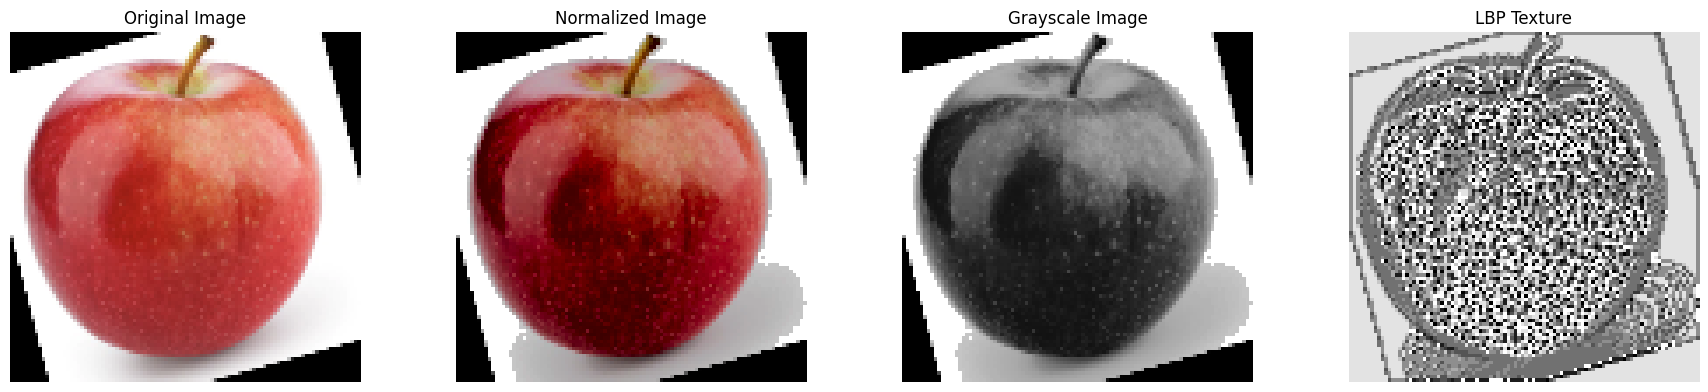


 Image: C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-08 at 5.03.05 PM.png
 Extracted Features:
Average R, G, B: [np.float64(83.024), np.float64(132.0046), np.float64(108.4828)]
LBP Histogram: [np.float64(0.0218), np.float64(0.0374), np.float64(0.0341), np.float64(0.1199), np.float64(0.2171), np.float64(0.2127), np.float64(0.0685), np.float64(0.058), np.float64(0.1631), np.float64(0.0674)]
 Prediction: FRESH
Image loaded successfully.


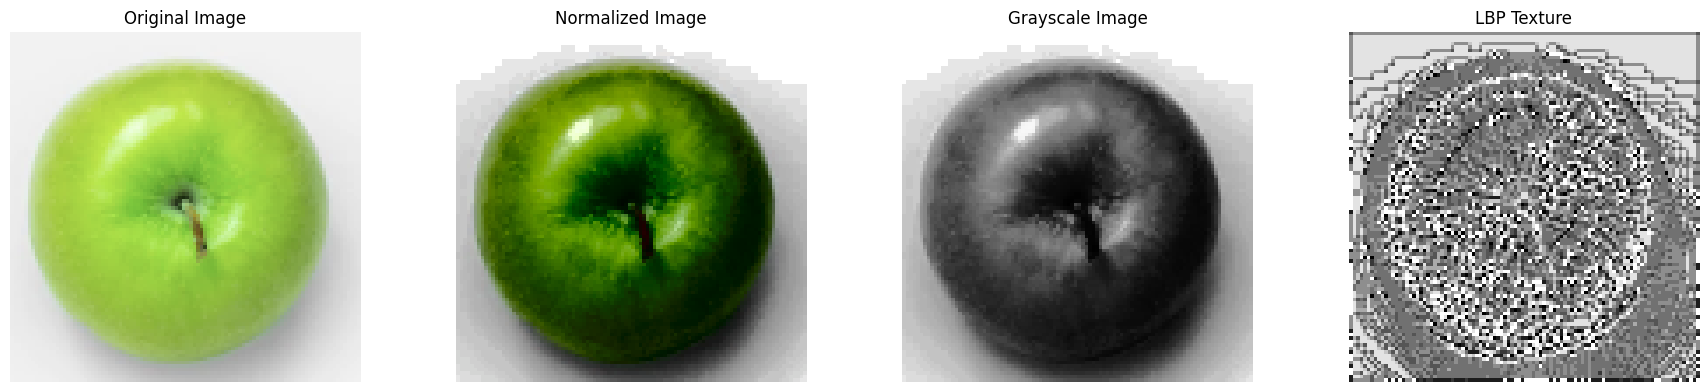


 Image: C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-12 at 8.49.41 PM.png
 Extracted Features:
Average R, G, B: [np.float64(120.441), np.float64(125.3387), np.float64(132.7405)]
LBP Histogram: [np.float64(0.0222), np.float64(0.0309), np.float64(0.0171), np.float64(0.0922), np.float64(0.0781), np.float64(0.2651), np.float64(0.0574), np.float64(0.0641), np.float64(0.3129), np.float64(0.06)]
 Prediction: ROTTEN
Image loaded successfully.


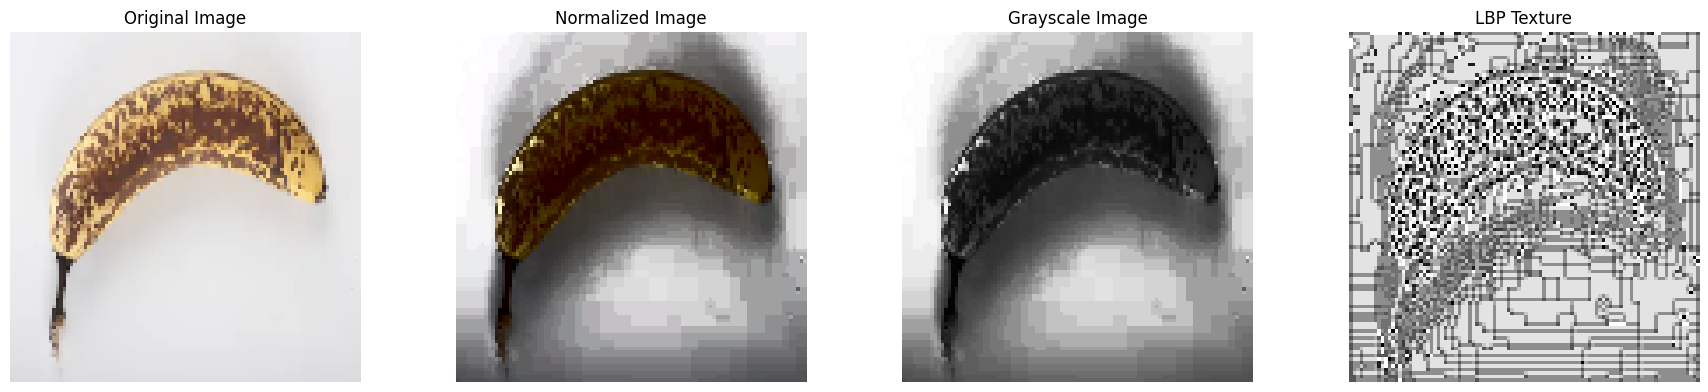


 Image: C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-12 at 11.50.41 PM.png
 Extracted Features:
Average R, G, B: [np.float64(108.4015), np.float64(130.0929), np.float64(171.4996)]
LBP Histogram: [np.float64(0.0456), np.float64(0.0516), np.float64(0.0249), np.float64(0.0596), np.float64(0.0814), np.float64(0.1228), np.float64(0.0428), np.float64(0.0689), np.float64(0.3879), np.float64(0.1145)]
 Prediction: FRESH
Image loaded successfully.


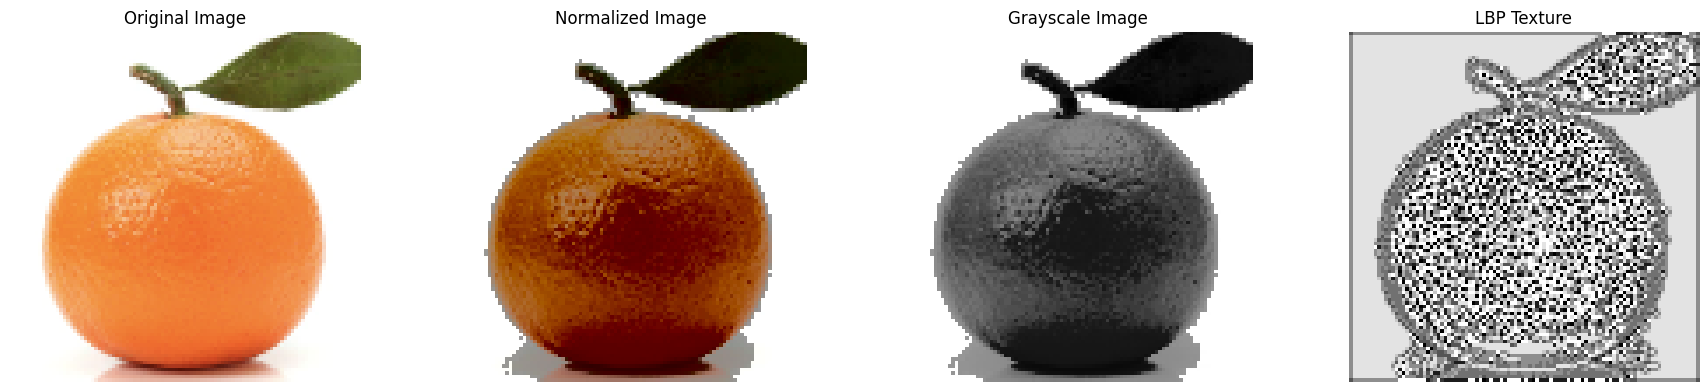


 Image: C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-12 at 11.27.01 PM.png
 Extracted Features:
Average R, G, B: [np.float64(104.056), np.float64(126.3976), np.float64(163.1651)]
LBP Histogram: [np.float64(0.0527), np.float64(0.0553), np.float64(0.0348), np.float64(0.0708), np.float64(0.1271), np.float64(0.1427), np.float64(0.0459), np.float64(0.0725), np.float64(0.2953), np.float64(0.1029)]
 Prediction: ROTTEN
Image loaded successfully.


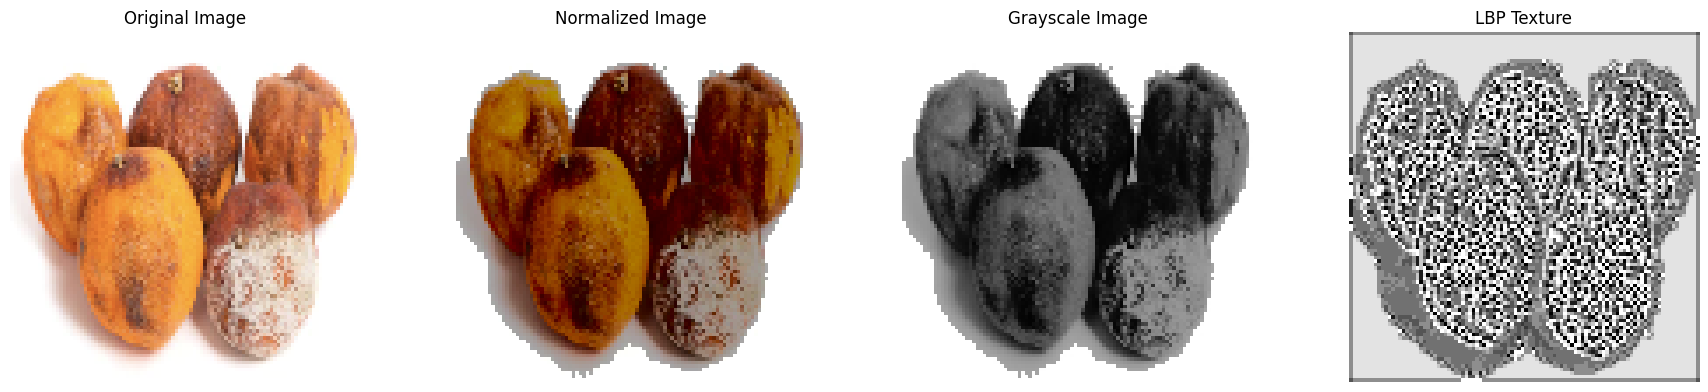


 Image: C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-12 at 11.20.05 PM.png
 Extracted Features:
Average R, G, B: [np.float64(122.6927), np.float64(136.7885), np.float64(164.6729)]
LBP Histogram: [np.float64(0.0545), np.float64(0.0497), np.float64(0.0255), np.float64(0.0524), np.float64(0.0877), np.float64(0.1241), np.float64(0.0375), np.float64(0.0697), np.float64(0.4005), np.float64(0.0984)]
 Prediction: ROTTEN
Image loaded successfully.


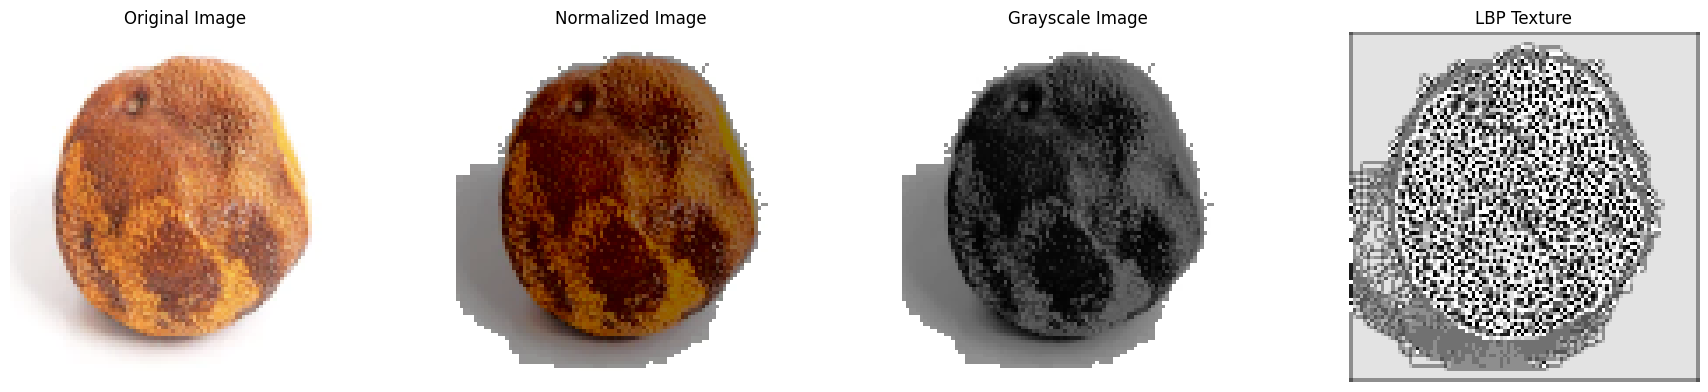


 Image: C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-12 at 10.00.00 PM.png
 Extracted Features:
Average R, G, B: [np.float64(120.4316), np.float64(145.1729), np.float64(157.9222)]
LBP Histogram: [np.float64(0.0097), np.float64(0.0258), np.float64(0.011), np.float64(0.0864), np.float64(0.1652), np.float64(0.175), np.float64(0.0368), np.float64(0.0515), np.float64(0.3916), np.float64(0.047)]
 Prediction: FRESH
Image loaded successfully.


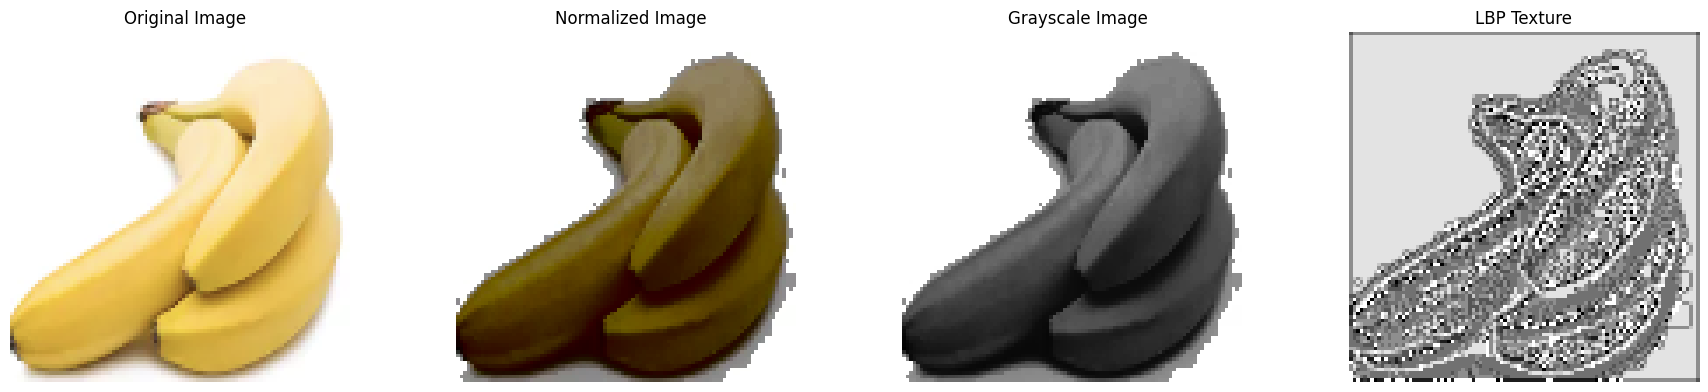


 Image: C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-07 at 2.15.50 PM.png
 Extracted Features:
Average R, G, B: [np.float64(115.8107), np.float64(121.8719), np.float64(170.8692)]
LBP Histogram: [np.float64(0.0411), np.float64(0.0465), np.float64(0.0363), np.float64(0.0751), np.float64(0.1215), np.float64(0.1564), np.float64(0.0575), np.float64(0.0676), np.float64(0.3087), np.float64(0.0893)]
 Prediction: ROTTEN
Image loaded successfully.


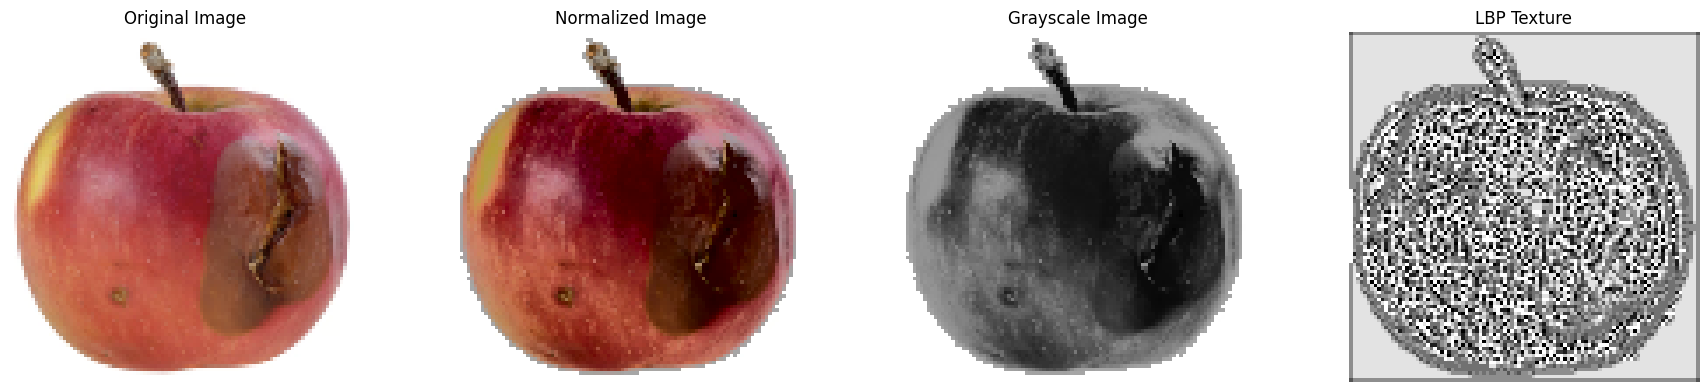

In [9]:
def classify_and_display_features(image_path):
    print(f"\n Image: {image_path}")
    features = extract_features(image_path)
    if features is None:
        print("Could not extract features (invalid image)")
        return

    print(" Extracted Features:")
    print("Average R, G, B:", features[:3])
    print("LBP Histogram:", features[3:])

    features_np = np.array(features).reshape(1, -1)
    prediction = rf_model.predict(features_np)[0]
    print(f" Prediction: {prediction.upper()}")

    visualize_feature_extraction(image_path)

#  List of image paths
image_paths = [
    "C:/Users/DELL/OneDrive/Desktop/AI Project/rotated_by_15_Screen Shot 2018-06-08 at 4.59.49 PM.png",
    "C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-08 at 5.03.05 PM.png",
    "C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-12 at 8.49.41 PM.png",
    "C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-12 at 11.50.41 PM.png",
    "C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-12 at 11.27.01 PM.png",
    "C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-12 at 11.20.05 PM.png",
    "C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-12 at 10.00.00 PM.png",
    "C:/Users/DELL/OneDrive/Desktop/AI Project/Screen Shot 2018-06-07 at 2.15.50 PM.png"
    

]

#  Loop through each image and classify
for path in image_paths:
    classify_and_display_features(path)
    

    
    
